In [1]:
import ISRAnalysis as an

Welcome to JupyROOT 6.14/04


In [2]:
binDef = "_FineCoarse"
detUnfold_muon_2016 = an.ISRAnalysis("2016", "electron", False, "matrix", \
                                     "Detector_Dressed_DR4PI_Fiducial", "Detector_Dressed_DR4PI", binDef)

ISRUnfold set!
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Pt
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Pt
ISRUnfold::setMassBindEdges 
0 th mass bin edge: 50
1 th mass bin edge: 64
2 th mass bin edge: 81
3 th mass bin edge: 101
4 th mass bin edge: 200
5 th mass bin edge: 320
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Mass
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Mass
ISRUnfold::setMassBindEdges 
ISRUnfold::setMassBindEdges massBinEdges already set.


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73


In [3]:
detUnfold_electron_2016 = an.ISRAnalysis("2016", "electron", False, "matrix", \
                                     "Detector_Dressed_DR4PI_Fiducial", "Detector_Dressed_DR4PI", binDef)

ISRUnfold set!
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Pt
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Pt
ISRUnfold::setMassBindEdges 
0 th mass bin edge: 50
1 th mass bin edge: 64
2 th mass bin edge: 81
3 th mass bin edge: 101
4 th mass bin edge: 200
5 th mass bin edge: 320
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Mass
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Mass
ISRUnfold::setMassBindEdges 
ISRUnfold::setMassBindEdges massBinEdges already set.


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73


In [4]:
sigma = detUnfold_muon_2016.checkMatrixCond()

Decompose(), successed? 1
Mass, Cond(): 8.58882

In [5]:
#sigma.Print()

In [6]:
detUnfold_muon_2016.checkMatrixCond("Pt")

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0x71806c8>

Decompose(), successed? 1
Pt, Cond(): 5.57357

In [7]:
# Nominal
detUnfold_muon_2016.setInputHist(False, False, None, "Detector")
detUnfold_muon_2016.setUnfoldBkgs(False, "Detector")
detUnfold_muon_2016.subFake() # Subract DY fake (out of fiducial volume at gen level)

In [8]:
#systematics = {"ID":["IdSFUp", "IdSFDown"], "ISO":["IsoSFUp", "IsoSFDown"], "TRG":["trgSFUp", "trgSFDown"], \
#              "PU":["PUUp", "PUDown"], "Scale":["ScaleABUp", "ScaleABDown"], "AlphaS":["AlphaSUp", "AlphaSDown"]}
#              #"Fake":["FakeUp", "FakeDown"]}
    
systematics = {"ID":["IdSFUp", "IdSFDown"], "TRG":["trgSFUp", "trgSFDown"], \
              "PU":["PUUp", "PUDown"], "Scale":["ScaleABUp", "ScaleABDown"], "AlphaS":["AlphaSUp", "AlphaSDown"]}

for sysName, postfixs in systematics.items():
    for postfix in postfixs:
        detUnfold_muon_2016.setSystematics(sysName, postfix)

for sysName, postfixs in systematics.items():
    for postfix in postfixs:
        print(sysName + " " + postfix)
        detUnfold_muon_2016.setInputHist(False, False, None, "Detector", True, sysName, postfix)
        detUnfold_muon_2016.setUnfoldBkgs(True, "Detector", sysName, postfix)

        detUnfold_muon_2016.subFake(True, sysName,postfix)

ID IdSFUp
ID IdSFDown
TRG trgSFUp
TRG trgSFDown
PU PUUp
PU PUDown
Scale ScaleABUp
Scale ScaleABDown
AlphaS AlphaSUp
AlphaS AlphaSDown


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding 

In [9]:
#detUnfold_electron_2016.setFromPrevUnfold(detUnfold_muon_2016.getISRUnfold())

In [10]:
detUnfold_muon_2016.doUnfold()
detUnfold_muon_2016.doUnfold(True)

Do systematic unfold!
Unfold for AlphaS systematic.
2 systematic variation exist.
posfix: AlphaSUp
posfix: AlphaSDown
Unfold for ID systematic.
2 systematic variation exist.
posfix: IdSFUp
posfix: IdSFDown
Unfold for PU systematic.
2 systematic variation exist.
posfix: PUUp
posfix: PUDown
Unfold for Scale systematic.
2 systematic variation exist.
posfix: ScaleABUp
posfix: ScaleABDown
Unfold for TRG systematic.
2 systematic variation exist.
posfix: trgSFUp
posfix: trgSFDown


Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: 

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
Systematic band exists!
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
Systematic band exists!
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
Systematic band exists!
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
Systematic band exists!
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
Systematic band exists!
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
Systematic band exists!
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
Systematic band exists!
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
Systematic band exists!
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
Systematic band exists!
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} 

Info in <TCanvas::Print>: png file DiPt_M0Pt_FineCoarseID.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M1Pt_FineCoarseID.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M2Pt_FineCoarseID.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M3Pt_FineCoarseID.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M4Pt_FineCoarseID.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M0Pt_FineCoarseTRG.png has been created
Warning in <TCanvas::Constructor>: Deleting c

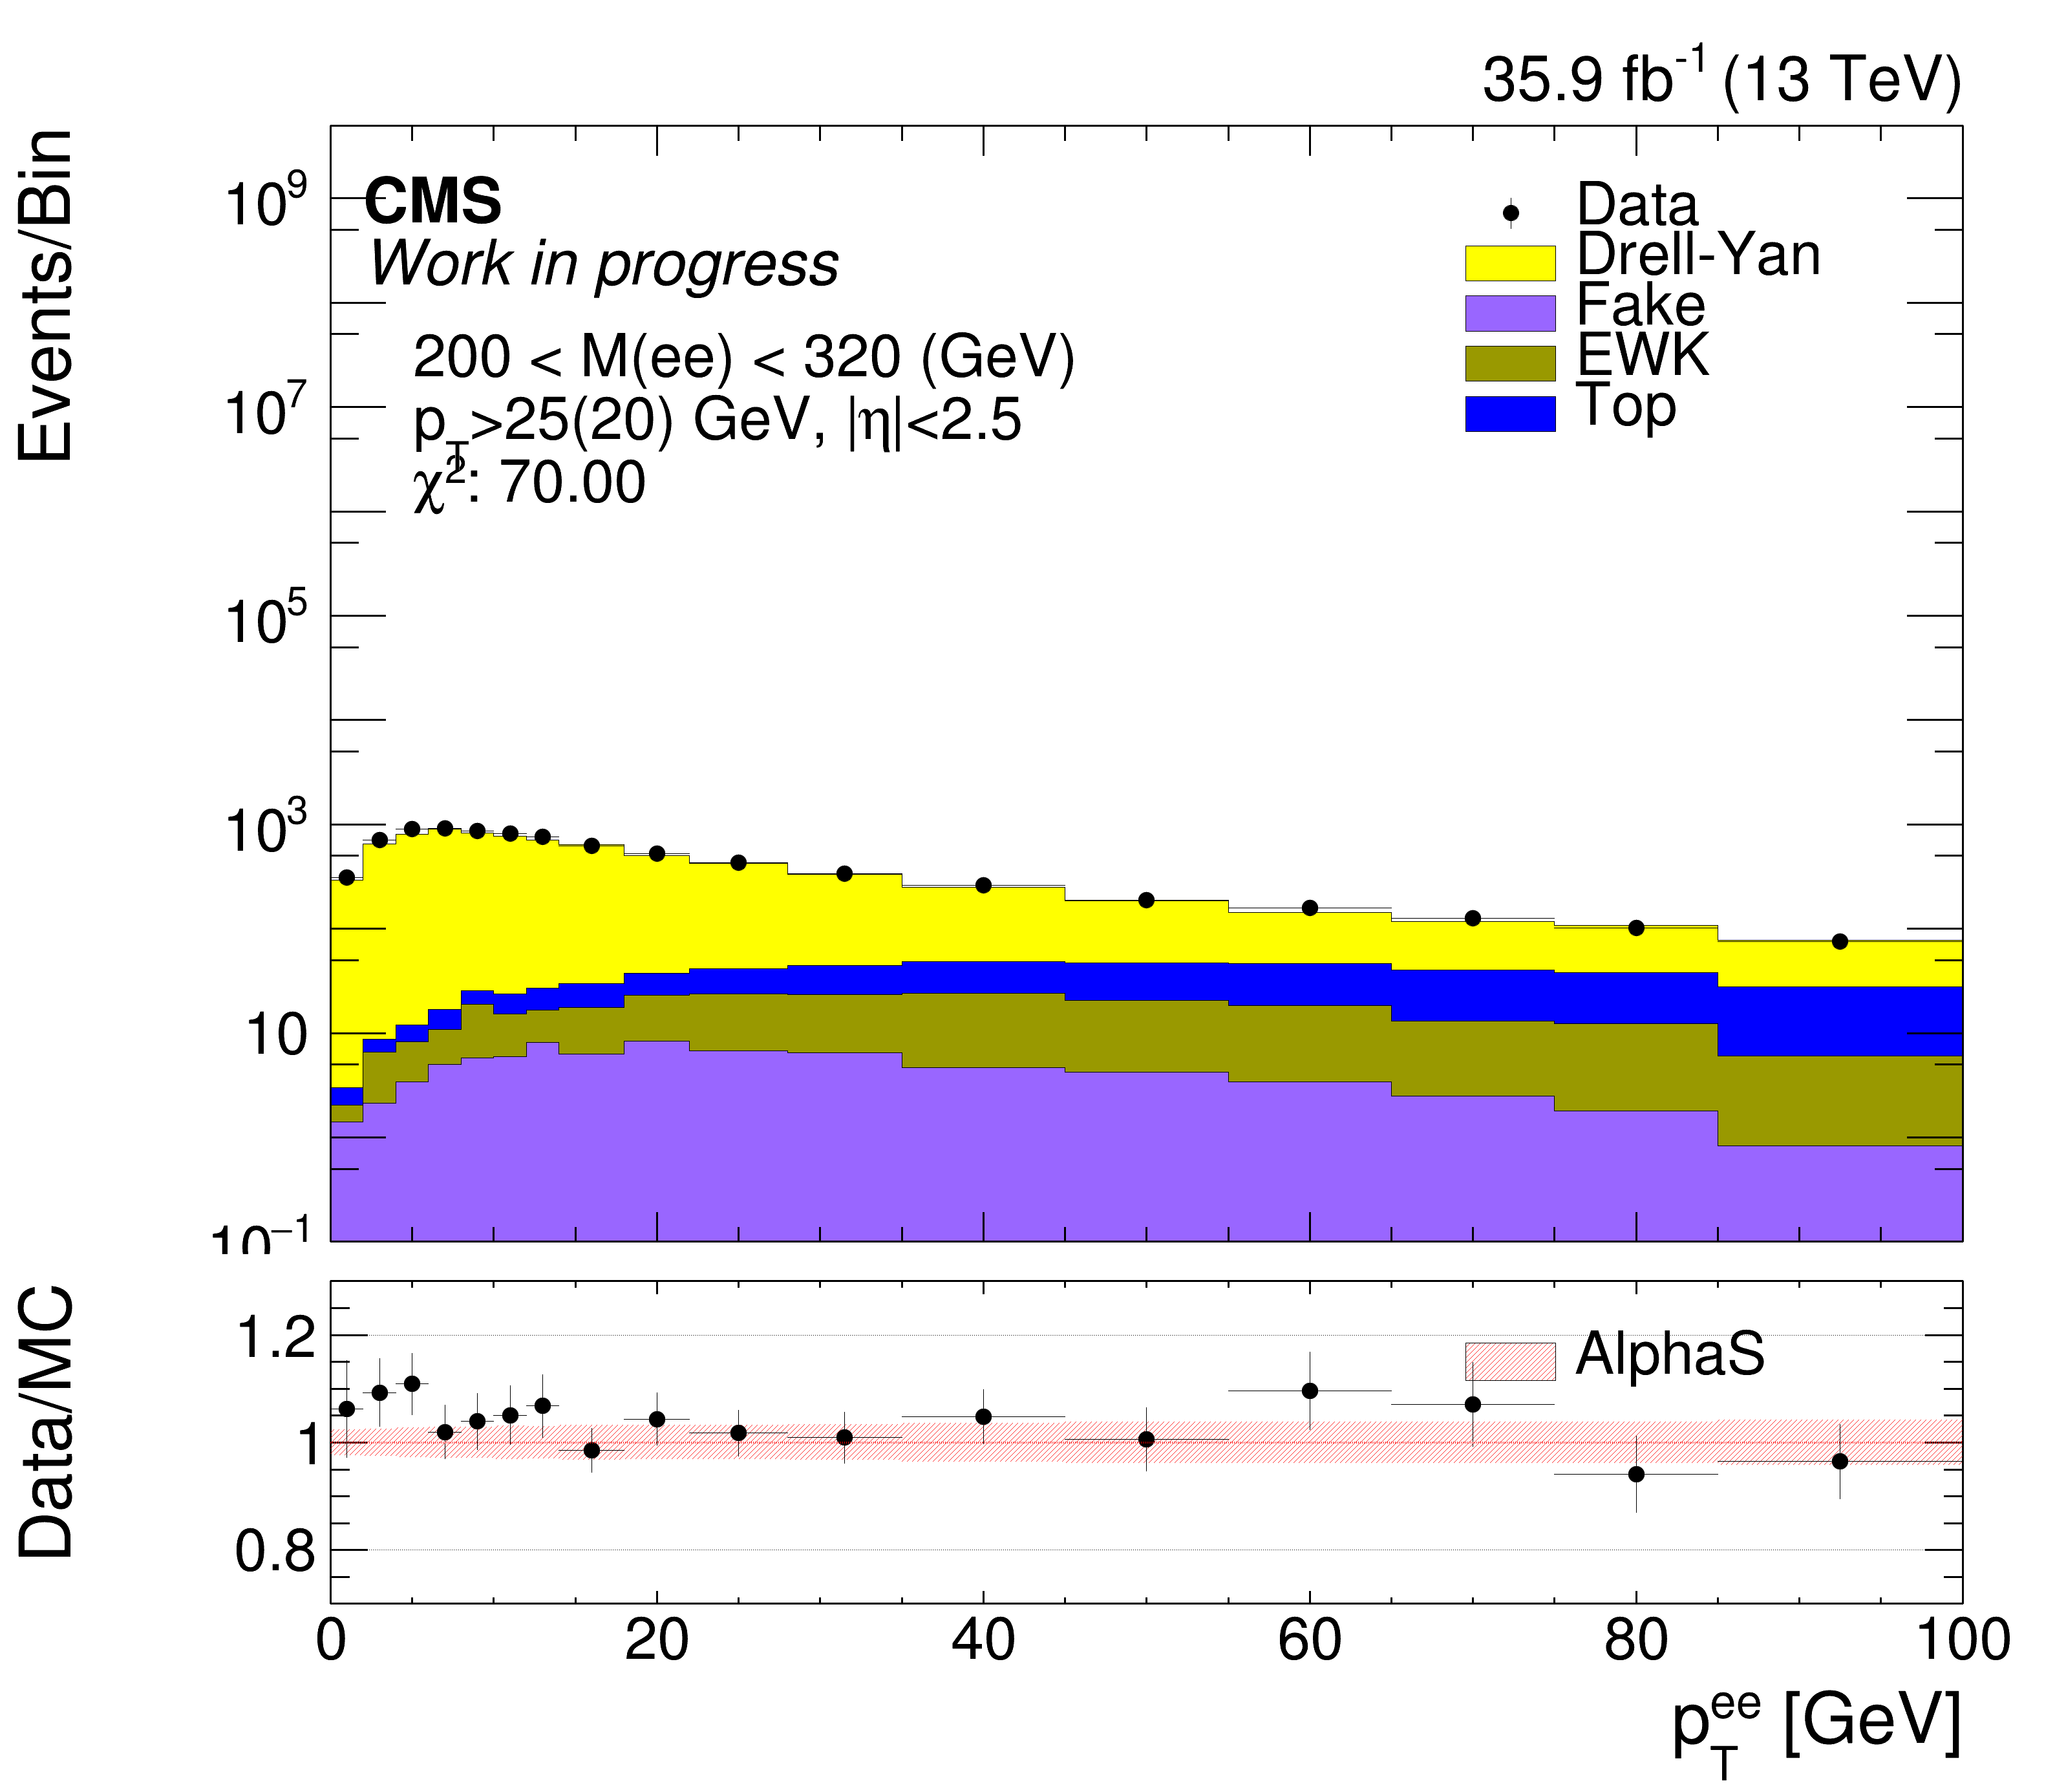

In [11]:
# 
for sysName, _ in systematics.items():
    for massBin in range(5):
        detUnfold_muon_2016.drawDetPlot("Pt"+binDef, "Detector", "pt[UO];mass[UOC"+str(massBin)+"]", True, sysName, "DiPt_M"+str(massBin), massBin, True)

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file detector_Mass_FineCoarse.png has been created


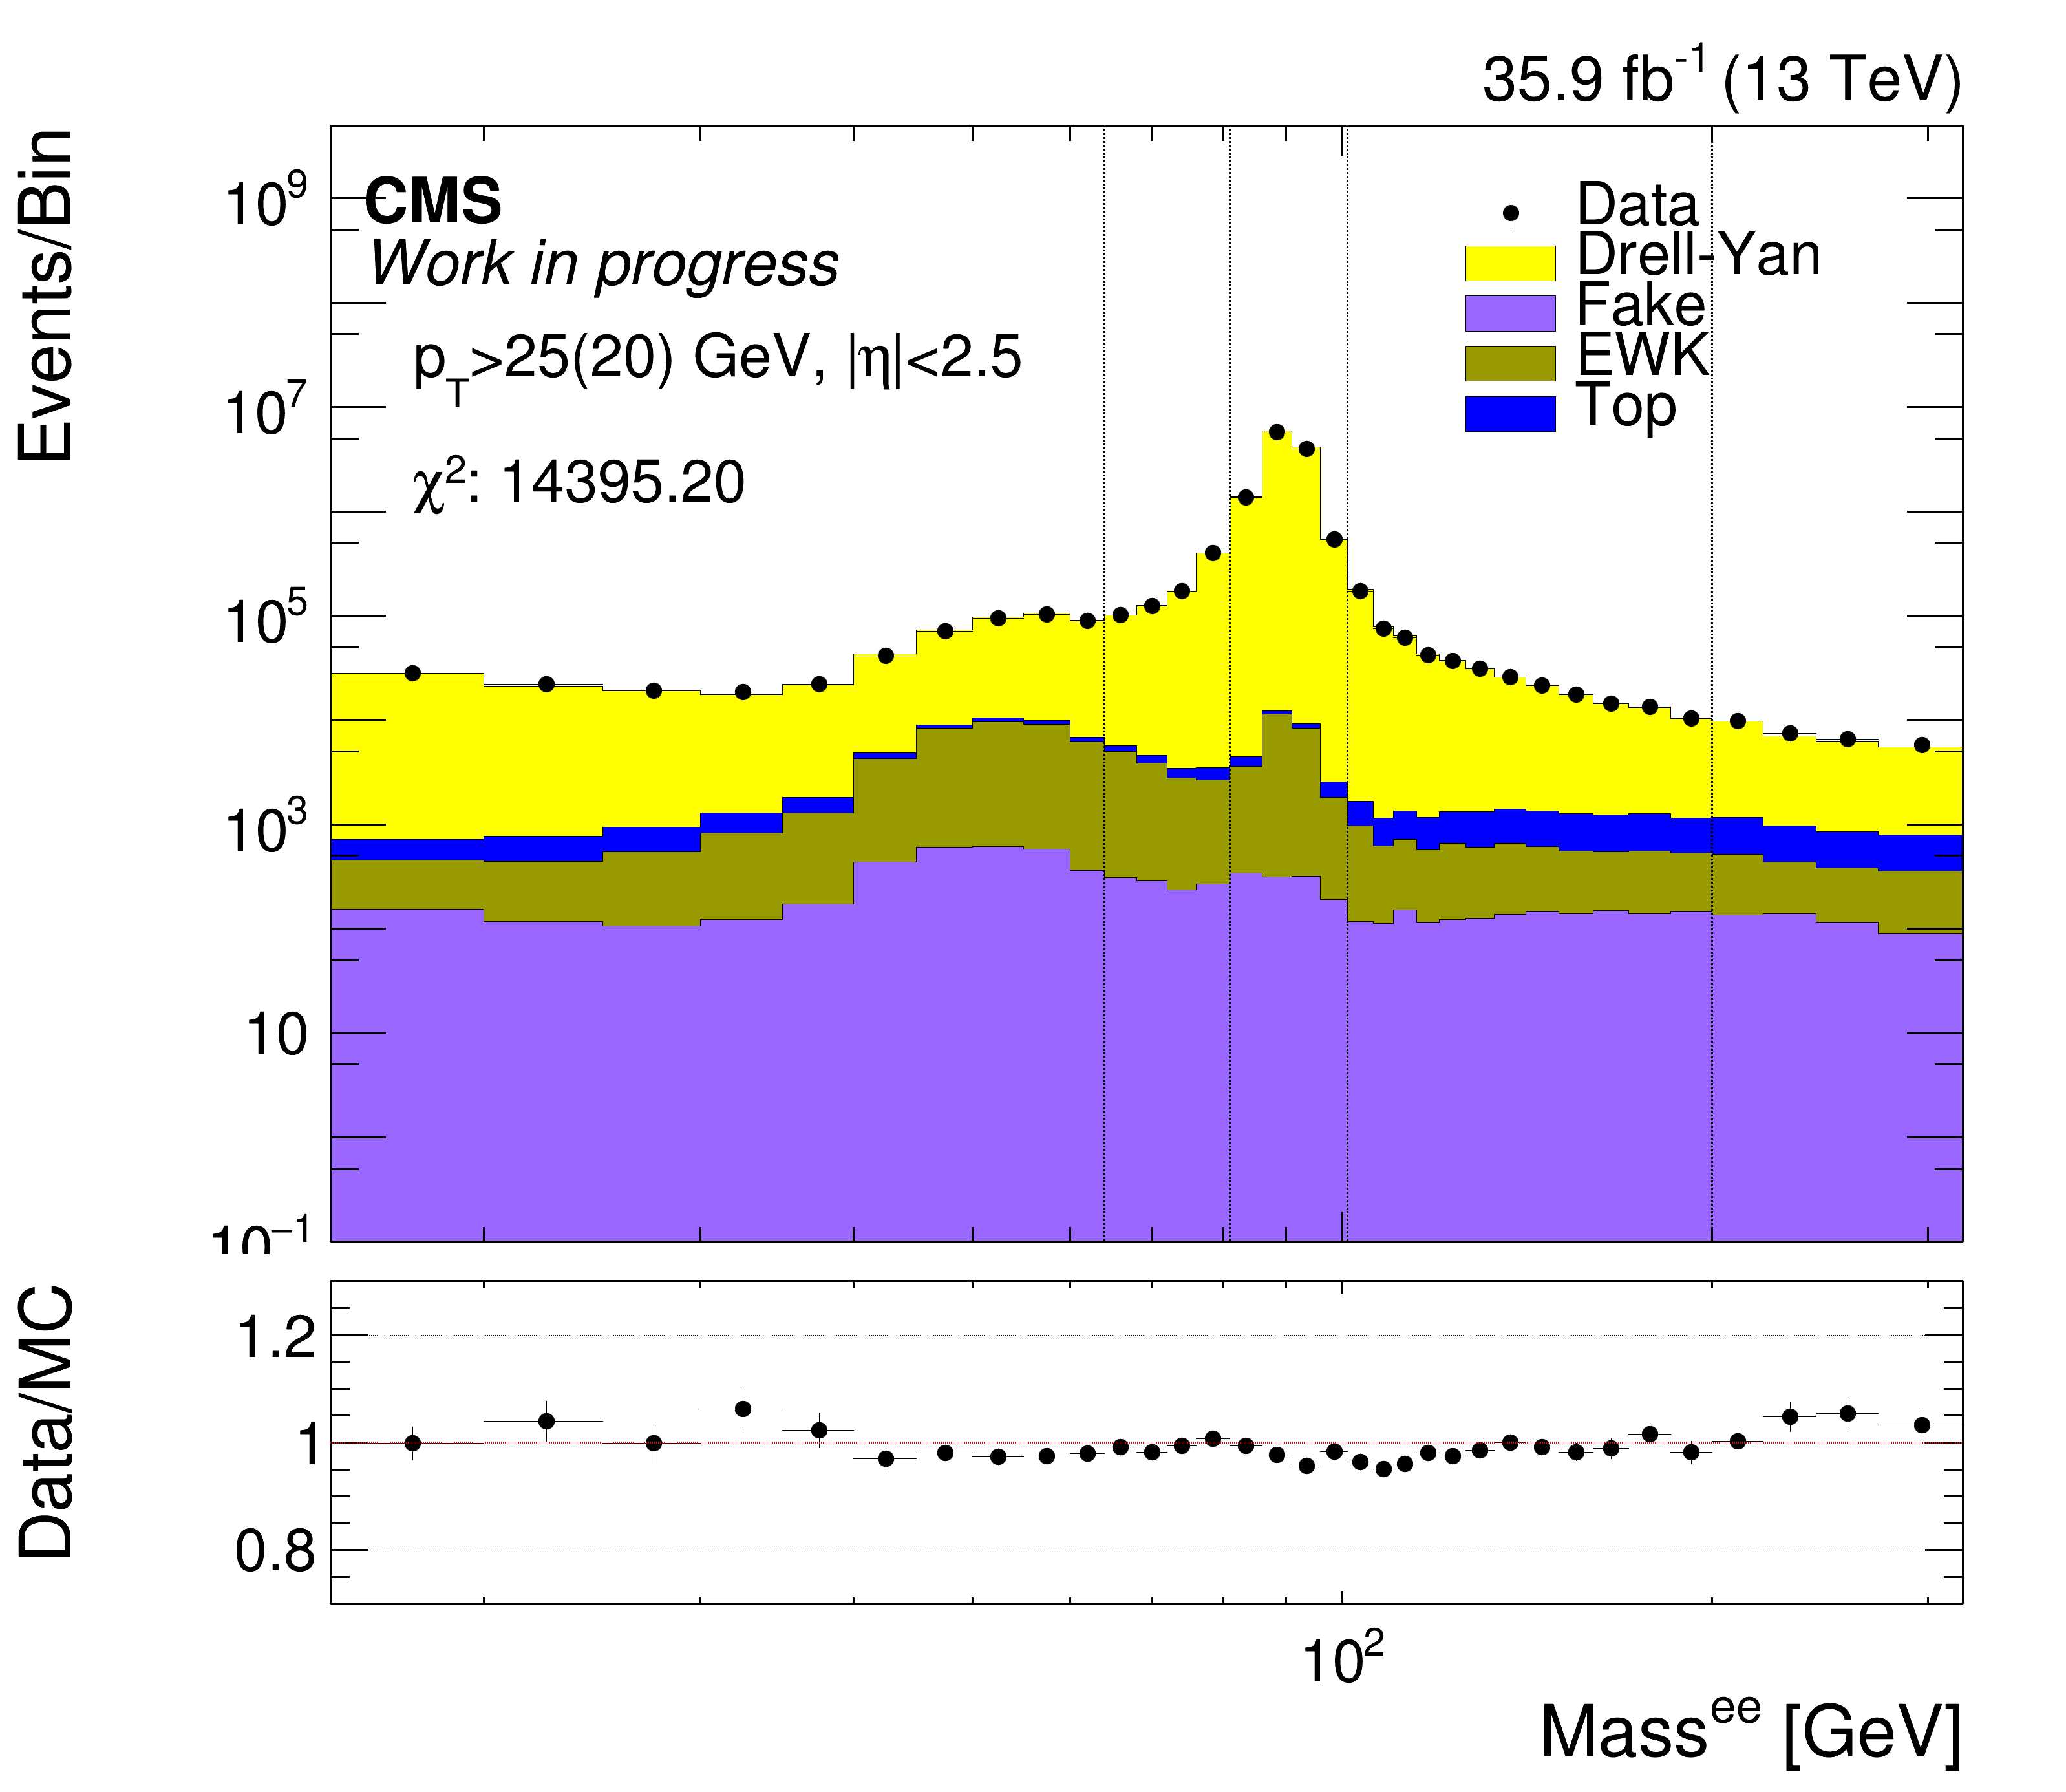

In [12]:
detUnfold_muon_2016.drawDetPlot("Mass"+binDef, "Detector", "mass[UO];pt[UOC0]", True, "")

In [13]:
#for massBin in range(0,5):
#    detUnfold_muon_2016.drawDetPlot("Pt_1D", "Detector_M_"+str(massBin), "", True, "AlphaS", "DiPt_M"+str(massBin)+"1GeVBin", massBin)

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 7997.04


Info in <TCanvas::Print>: png file unfolded_Mass.png has been created


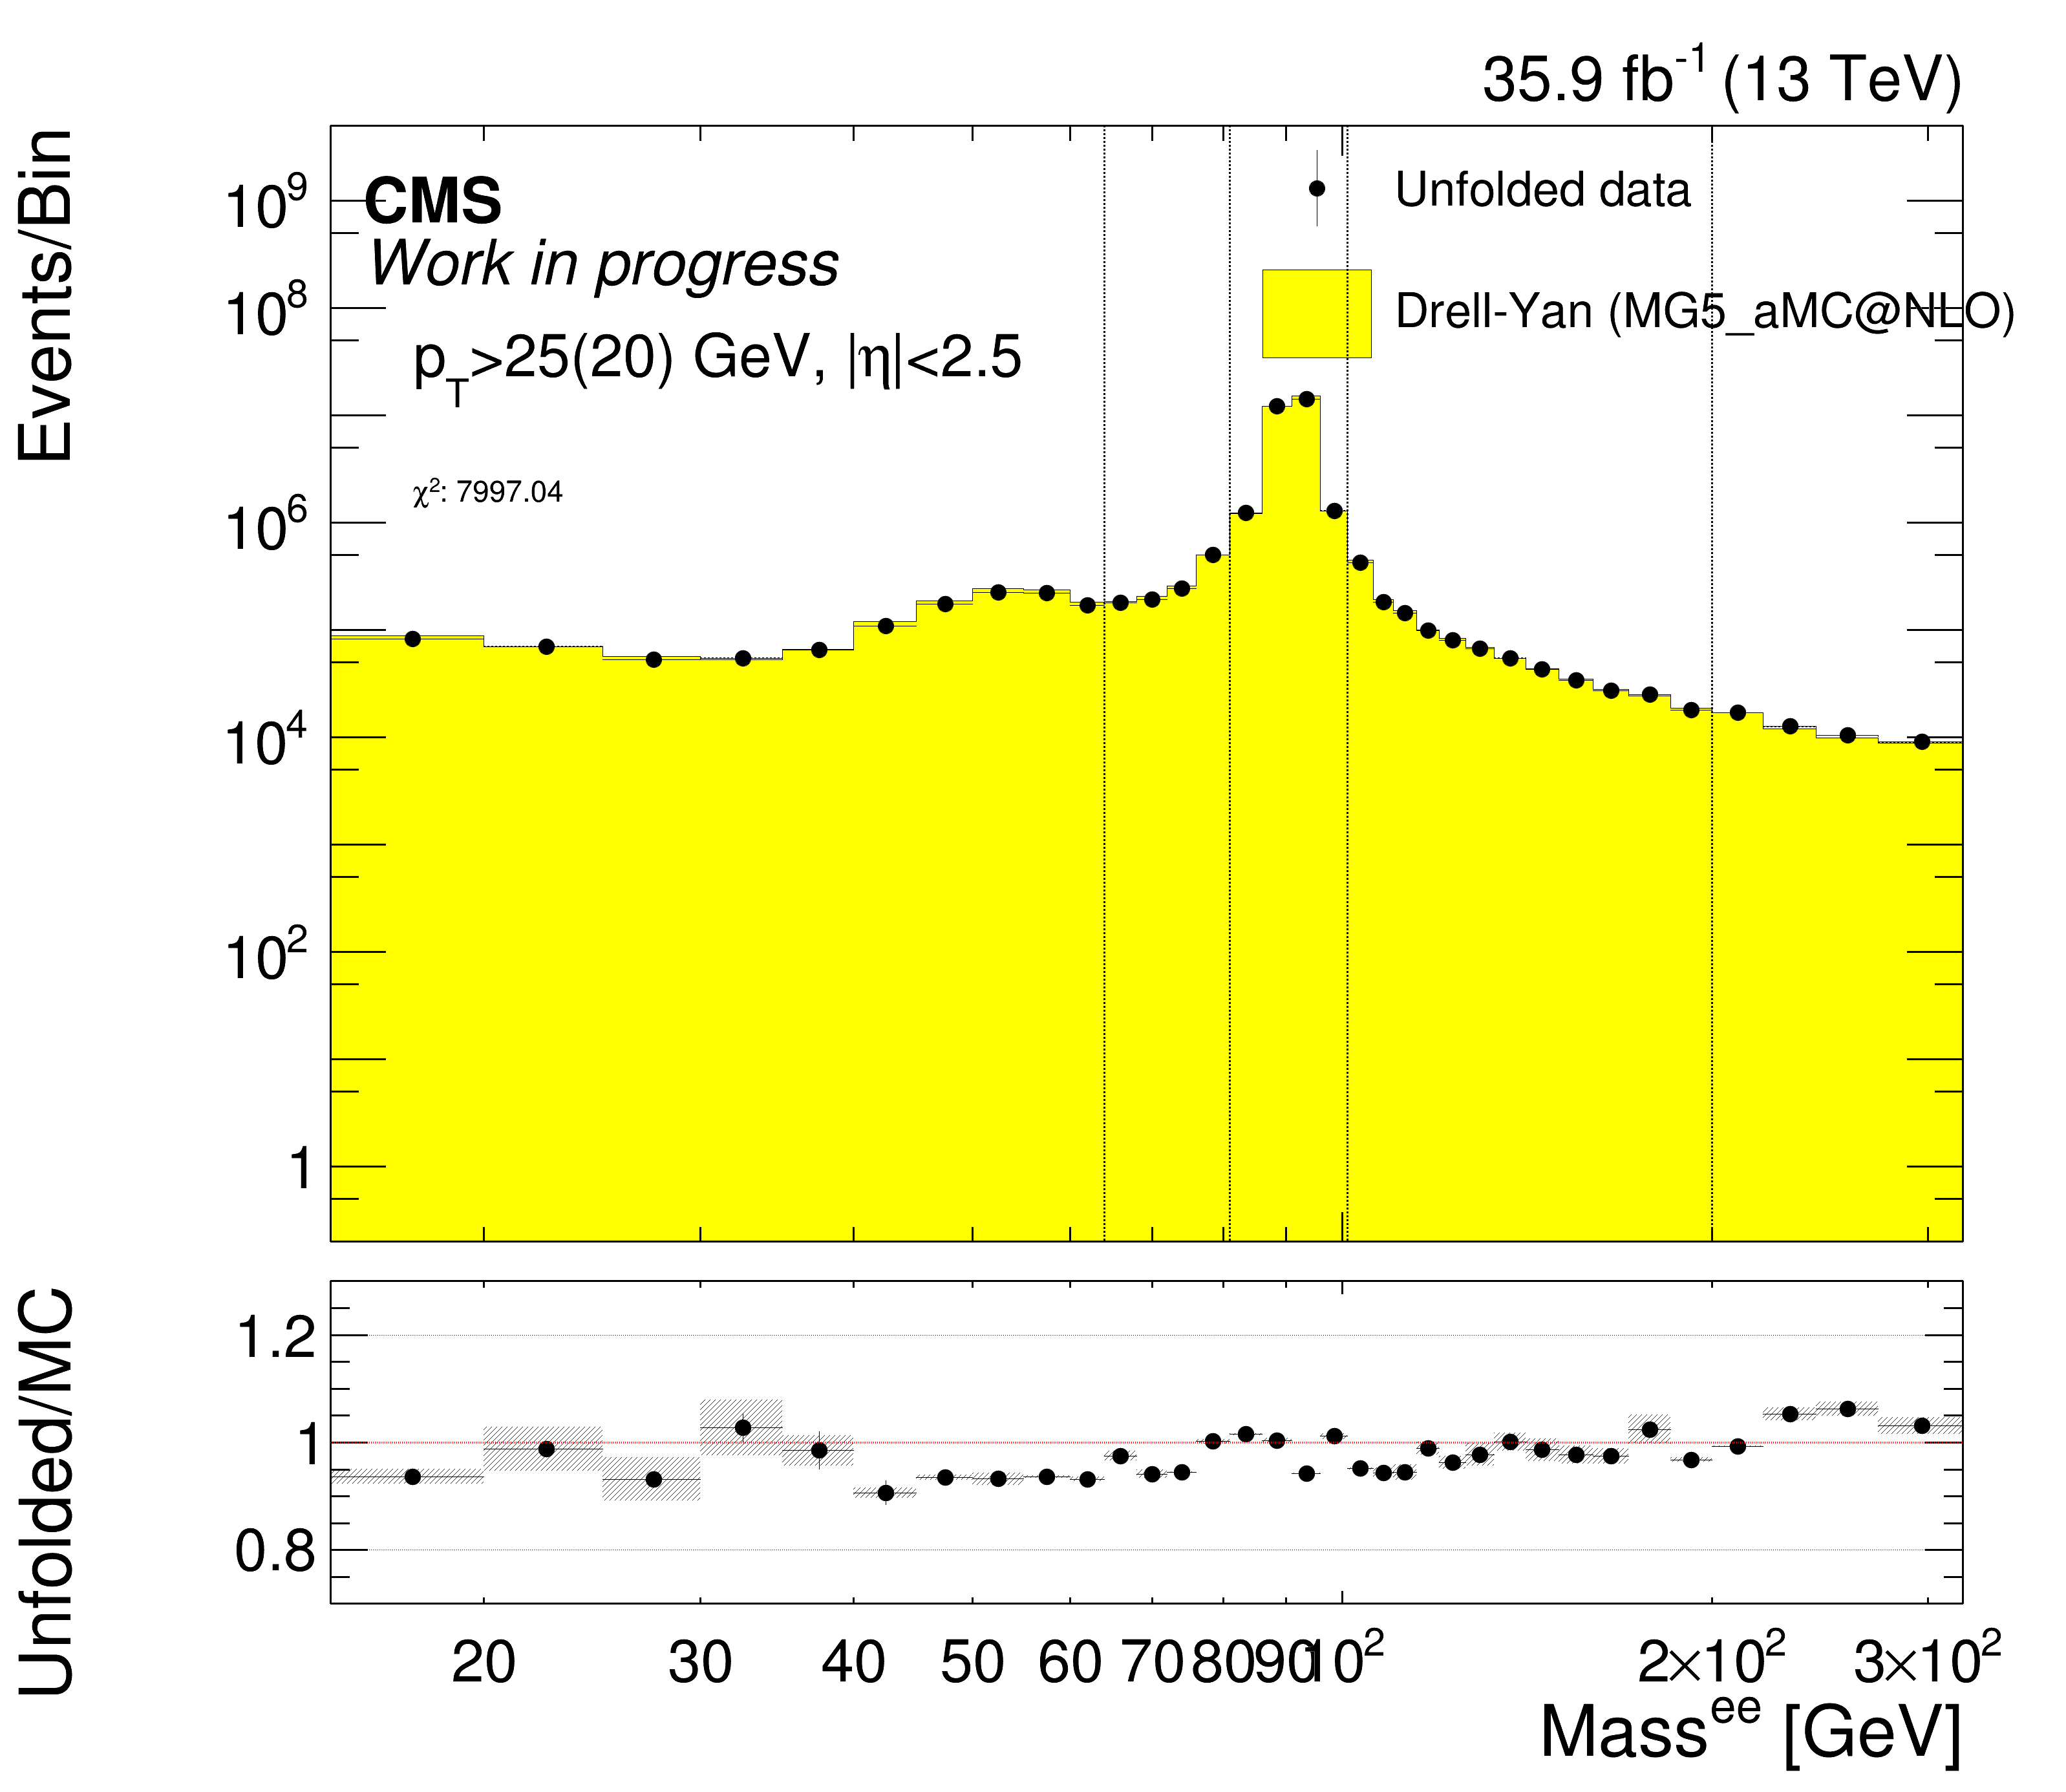

In [14]:
detUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "Scale")

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 288.516
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 38.2134
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 5425.14
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 309.566
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 36.7042


Info in <TCanvas::Print>: png file UnfDiPt_M0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M3.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M4.png has been created


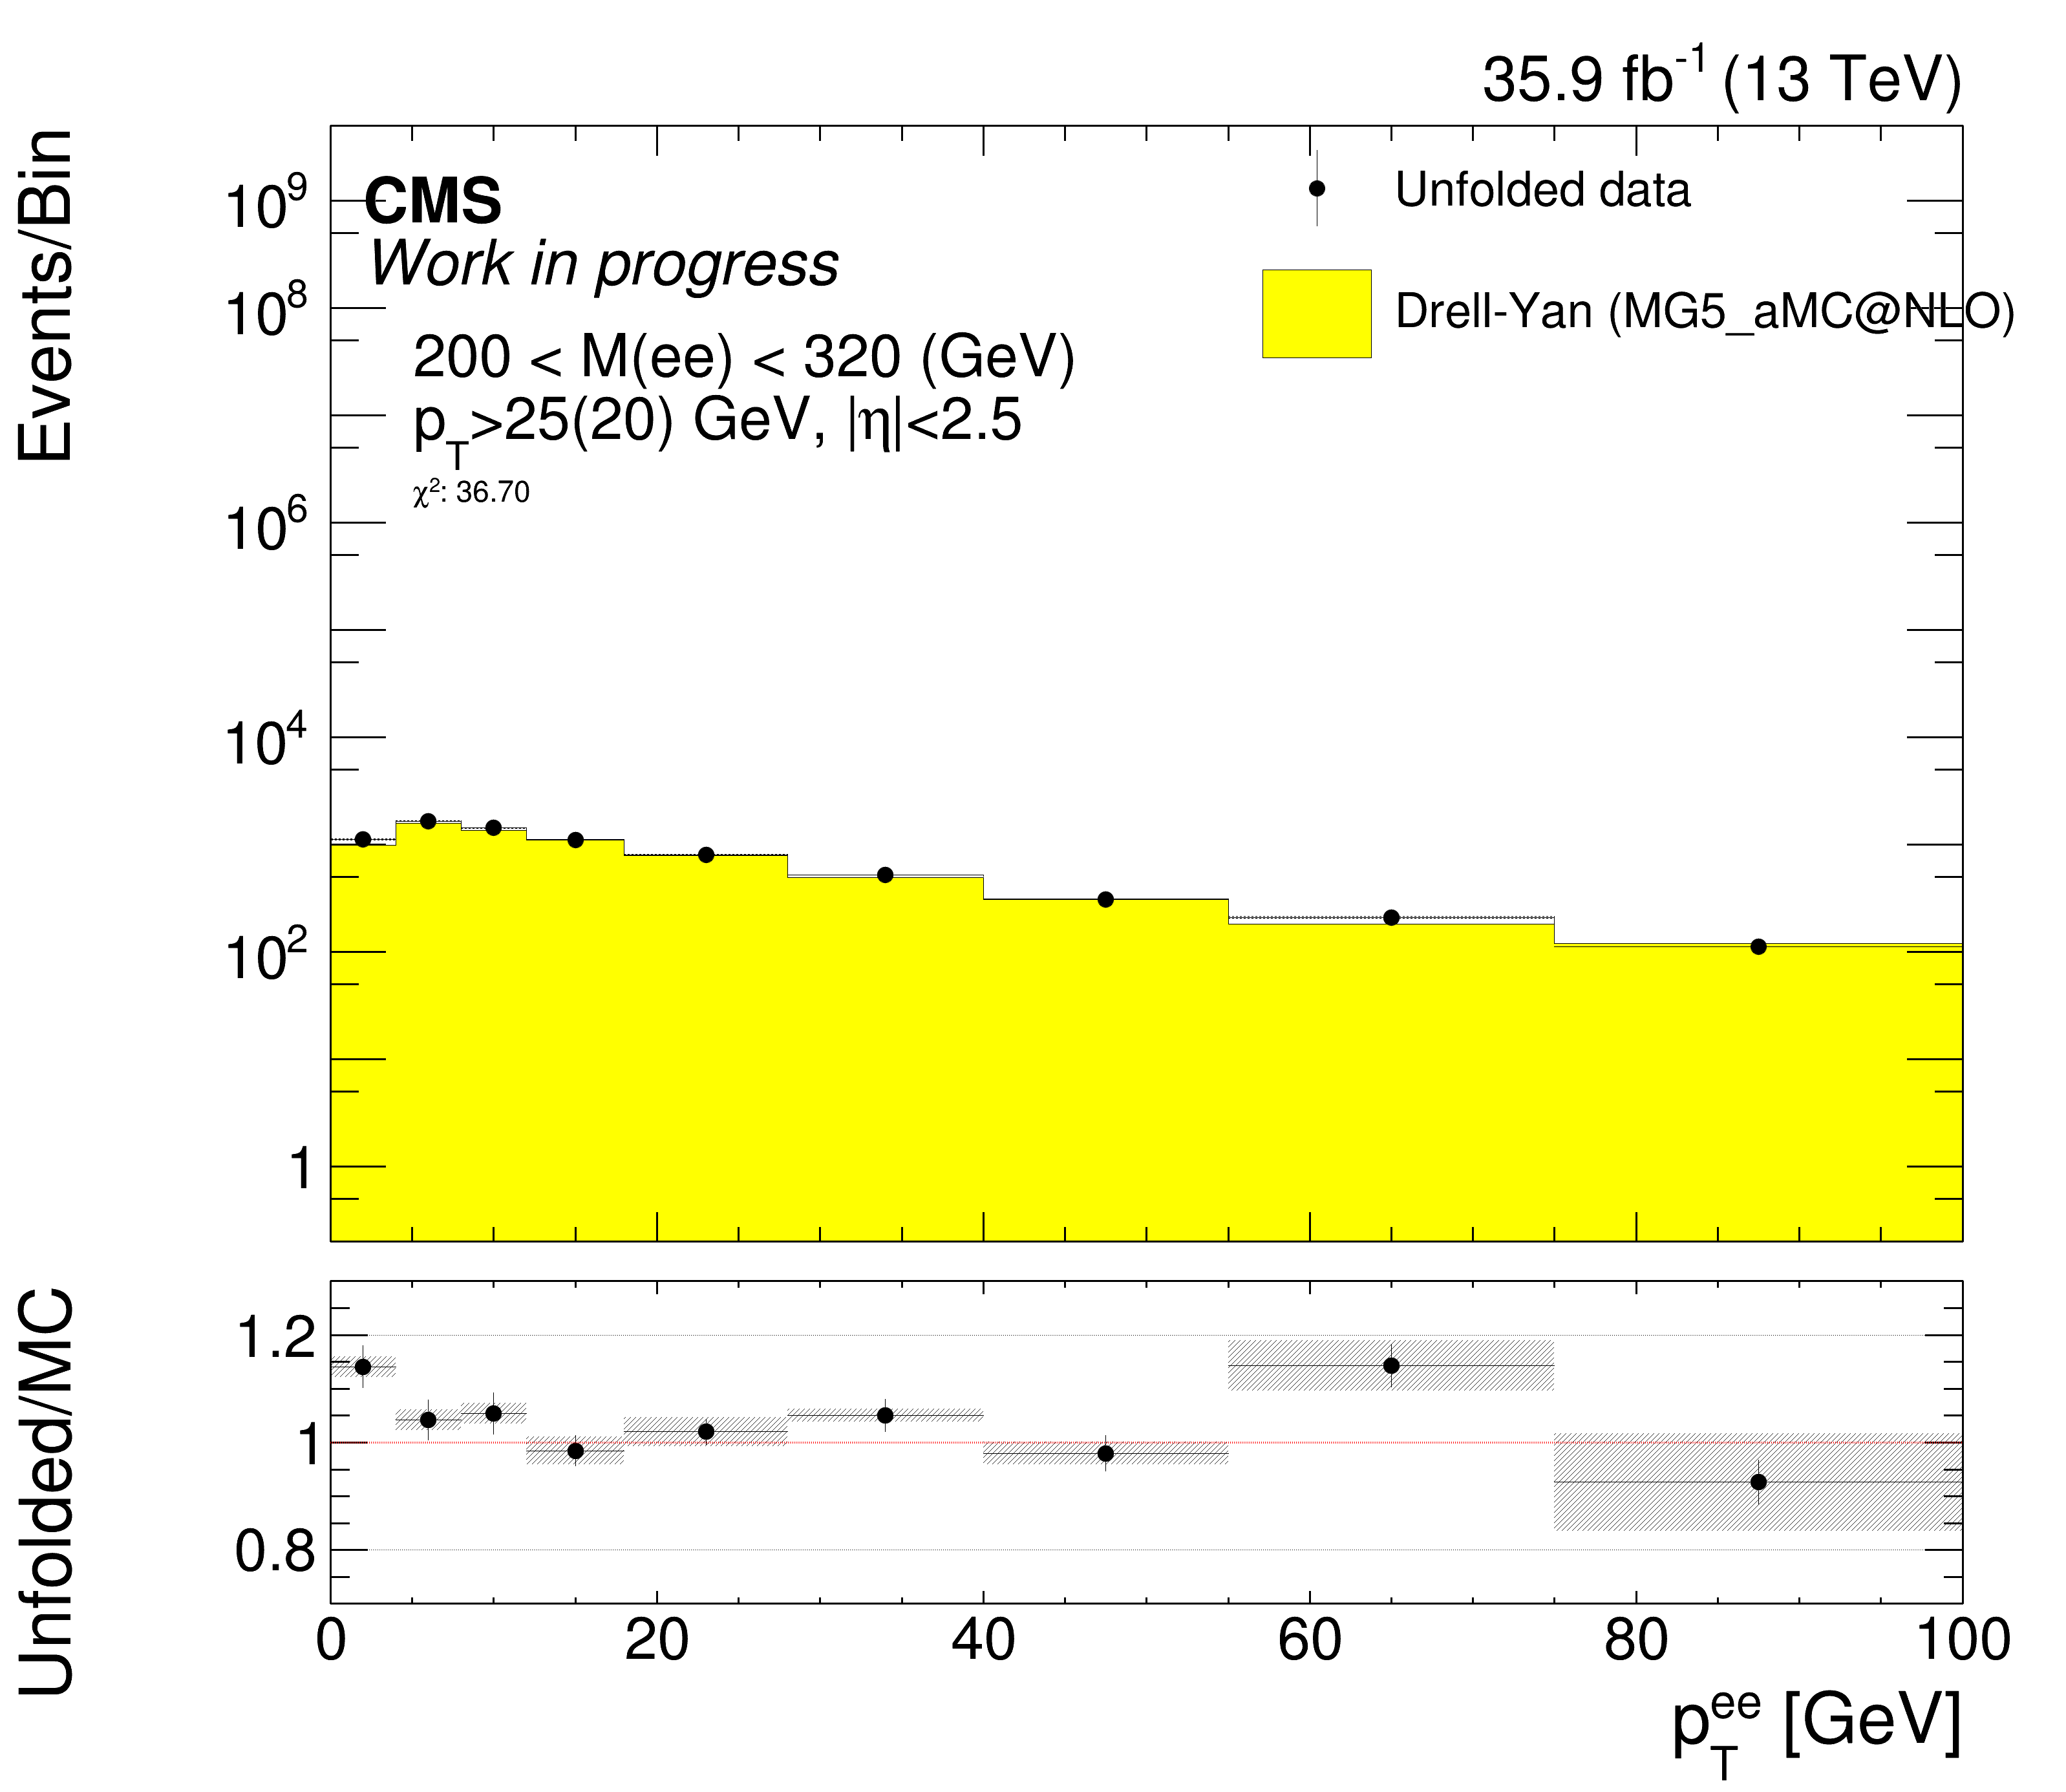

In [15]:
for massBin in range(5):
    detUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "Scale", "UnfDiPt_M"+str(massBin), massBin, True)

In [16]:
detUnfold_muon_2016.setMeanValues()

ISRUnfold::setMeanMass()   Save mean of dilepton...
ISRUnfold::setMeanPt()   Save mean of dilepton momentum...


In [17]:
detUnfold_muon_2016.setSysMeanValues()

ISRUnfold::setSysMeanMass()   Save mean of dilepton...
Unfold for AlphaS systematic.
2 systematic variation exist.
AlphaS AlphaSUp 56.9064
AlphaS AlphaSUp 74.0425
AlphaS AlphaSUp 91.1917
AlphaS AlphaSUp 117.969
AlphaS AlphaSUp 241.726
AlphaS AlphaSDown 56.9028
AlphaS AlphaSDown 74.0376
AlphaS AlphaSDown 91.1916
AlphaS AlphaSDown 117.976
AlphaS AlphaSDown 241.72
Unfold for ID systematic.
2 systematic variation exist.
ID IdSFUp 56.9108
ID IdSFUp 74.0703
ID IdSFUp 91.2
ID IdSFUp 117.994
ID IdSFUp 241.578
ID IdSFDown 56.9012
ID IdSFDown 74.0085
ID IdSFDown 91.1817
ID IdSFDown 117.952
ID IdSFDown 241.855
Unfold for PU systematic.
2 systematic variation exist.
PU PUUp 56.9012
PU PUUp 74.0456
PU PUUp 91.197
PU PUUp 117.954
PU PUUp 241.74
PU PUDown 56.9105
PU PUDown 74.0335
PU PUDown 91.1845
PU PUDown 117.992
PU PUDown 241.689
Unfold for Scale systematic.
2 systematic variation exist.
Scale ScaleABUp 56.9176
Scale ScaleABUp 74.0446
Scale ScaleABUp 91.1922
Scale ScaleABUp 117.994
Scale ScaleABU

In [18]:
detUnfold_muon_2016.setSysError()

Systematic: AlphaS 0 mass bin 
mass: 0.00323901 pt: 0.0129586
Systematic: AlphaS 1 mass bin 
mass: 0.00283688 pt: 0.00497556
Systematic: AlphaS 2 mass bin 
mass: 0.000758539 pt: 0.00173429
Systematic: AlphaS 3 mass bin 
mass: 0.00423788 pt: 0.0139039
Systematic: AlphaS 4 mass bin 
mass: 0.0105154 pt: 0.055815
Systematic: ID 0 mass bin 
mass: 0.0048082 pt: 0.0909259
Systematic: ID 1 mass bin 
mass: 0.0311138 pt: 0.0723218
Systematic: ID 2 mass bin 
mass: 0.00919564 pt: 0.0194938
Systematic: ID 3 mass bin 
mass: 0.0214991 pt: 0.0456679
Systematic: ID 4 mass bin 
mass: 0.139513 pt: 0.0702296
Systematic: PU 0 mass bin 
mass: 0.00485809 pt: 0.00722298
Systematic: PU 1 mass bin 
mass: 0.00616003 pt: 0.00409571
Systematic: PU 2 mass bin 
mass: 0.00639617 pt: 0.00842255
Systematic: PU 3 mass bin 
mass: 0.0191167 pt: 0.00733734
Systematic: PU 4 mass bin 
mass: 0.0260406 pt: 0.0105909
Systematic: Scale 0 mass bin 
mass: 0.0156146 pt: 0.13608
Systematic: Scale 1 mass bin 
mass: 0.00499586 pt: 0.0

In [19]:
detUnfold_muon_2016.setTotSysError()

In [20]:
gr_2016_muon_det_unfold =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf")
gr_2016_muon_det_unfold_sys =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf",True,True)

In [21]:
gr_2016_muon_det =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDet", False)

20.1 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file Run2_detector.png has been created


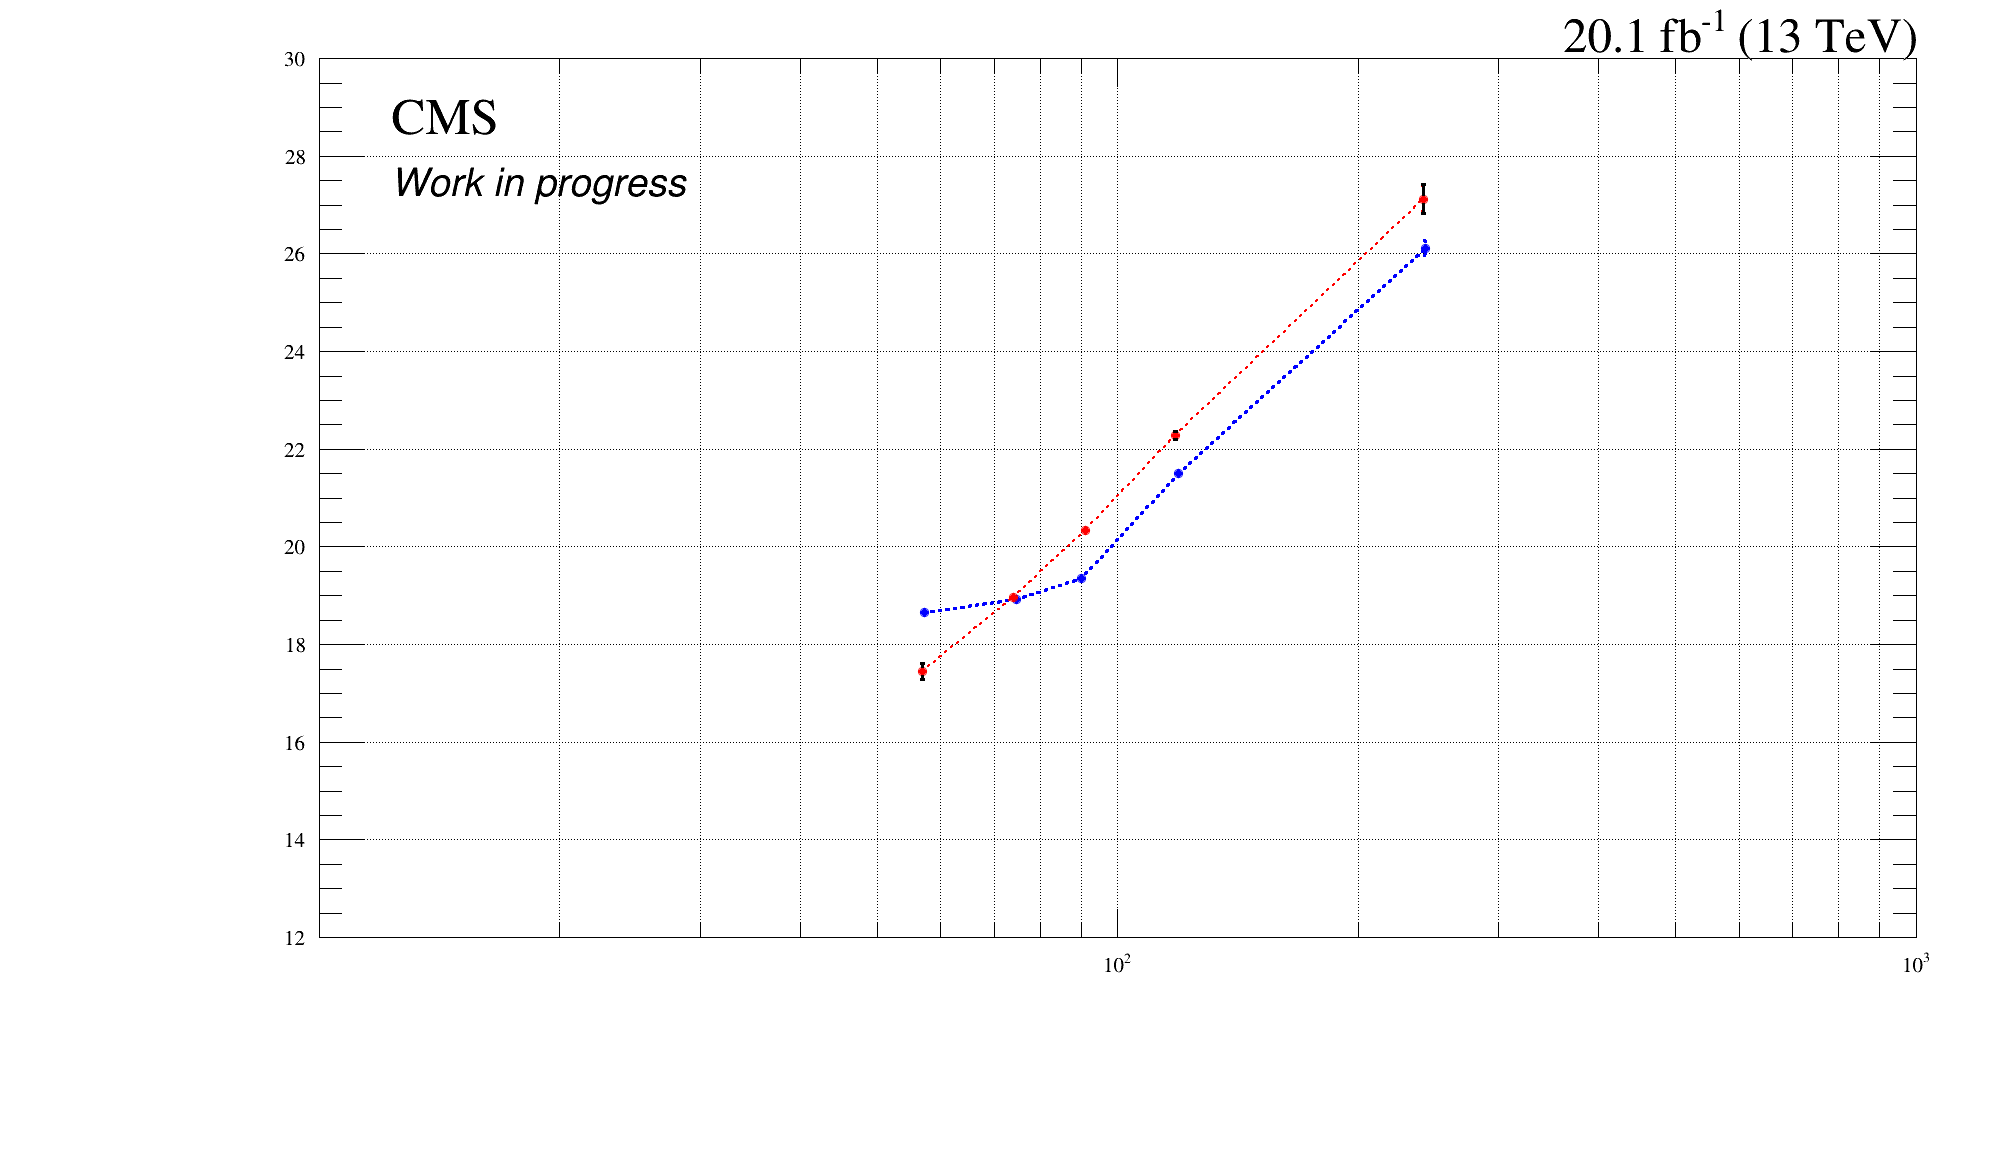

In [22]:
import pyScripts.tdrStyle as tdrStyle
import pyScripts.CMS_lumi as CMS_lumi
import ROOT as rt
markerSize = 1.2

tdrStyle.setTDRStyle()
rt.gStyle.SetOptFit(0)

c_PtVsMass_detector = rt.TCanvas("PtVsMass_detector","PtVsMass_detector", 2000, 1200)
c_PtVsMass_detector.SetGridx()
c_PtVsMass_detector.SetGridy()
c_PtVsMass_detector.SetLogx()
c_PtVsMass_detector.SetBottomMargin(0.2)

gr_2016_muon_det.SetTitle("2016, 2017, 2018 Detector level")
gr_2016_muon_det.Draw("APL")
gr_2016_muon_det.GetYaxis().SetRangeUser(12., 30.)
gr_2016_muon_det.GetXaxis().SetLimits(10., 1000.)
gr_2016_muon_det.SetMarkerStyle(20)
gr_2016_muon_det.SetLineStyle(2)
gr_2016_muon_det.SetMarkerSize(markerSize)
gr_2016_muon_det.SetMarkerColor(rt.kBlue)
gr_2016_muon_det.SetLineColor(rt.kBlue)

gr_2016_muon_det_unfold.Draw("PL SAME")
gr_2016_muon_det_unfold.SetLineWidth(2)
gr_2016_muon_det_unfold.SetMarkerColor(rt.kRed)
gr_2016_muon_det_unfold.SetLineStyle(2)
gr_2016_muon_det_unfold.SetLineColor(rt.kRed)

gr_2016_muon_det_unfold_sys.Draw("E SAME")
gr_2016_muon_det_unfold_sys.SetLineWidth(3)
gr_2016_muon_det_unfold_sys.SetMarkerColor(rt.kBlack)
gr_2016_muon_det_unfold_sys.SetLineColor(rt.kBlack)

CMS_lumi.extraText = "Work in progress"
CMS_lumi.CMS_lumi(c_PtVsMass_detector, 4, 11)
c_PtVsMass_detector.Draw()
c_PtVsMass_detector.SaveAs("Run2_detector.png")